In [12]:
# Mouse wise correlation between VI and CD8 T cell/Parasite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import os
os.chdir("/Users/soumenbera/Documents/killing_Tcells")
data = pd.read_excel('Data_killing_23July2018-curated-final.xlsx') #data path
df = pd.DataFrame(data,columns = ['Time','Background','Tcells','Parasite ID','Intensity', 'Mouse'])
#df["Intensity_scale"] = np.log10(df.Intensity)
#df["Intensity_scale1"] = df.Intensity_scale.fillna(df.Intensity_scale.mean())
df["Time_1"] = df.Time/60.0
df["Intensity_scale"] = df.Intensity.fillna(df.Intensity.mean())
df["Background_scale"] = df.Background.fillna(df.Background.mean())
df["VI_Index"] = np.log10(df["Intensity_scale"]/df["Background_scale"])
#df.loc[(df.Intensity_scale1>np.mean(df.Intensity_scale1))|((df.Intensity_scale1<=np.mean(df.Intensity_scale1)))]
from sklearn import preprocessing
#df["time_scaled"] = preprocessing.scale(df.Time.values)
#print (df)
#print (df['Time from T transfer (min)'], df['Parasite ID']==1)
#df["Intensity_scale2"]=df.Intensity_scale>np.mean(df.Intensity_scale1)
df1 = pd.DataFrame(df,columns = ['Time_1','Intensity_scale','Background_scale','VI_Index', 'Tcells','Mouse'])

0       1
1       1
2       1
3       1
4       1
       ..
2114    3
2115    3
2116    3
2117    3
2118    3
Name: Mouse, Length: 2119, dtype: int64


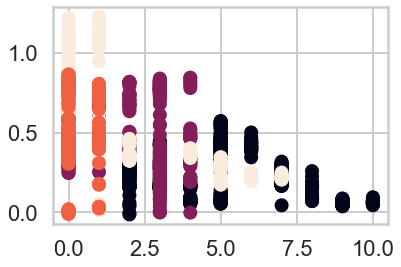

In [13]:
#df1.groupby(['Tcells','Exp [Py()]']).count()['VI_Index'].unstack().plot()
#plt.plot(df1['Tcells'],df1['VI_Index'],'o')
colors = {1:'red', 2:'green', 3:'blue', 4:'yellow'}
print(df['Mouse'])
plt.scatter(df1['Tcells'], df1['VI_Index'], c=df1['Mouse'])

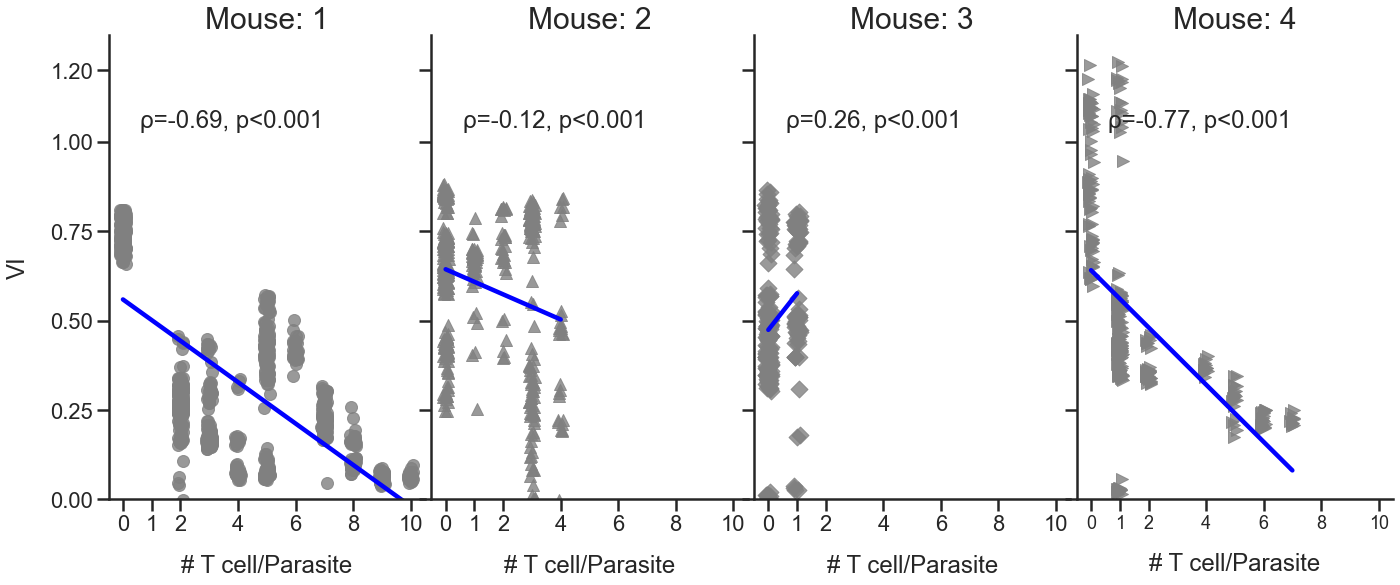

In [17]:
import seaborn as sns
import scipy as sp
from sklearn import linear_model
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("ticks")  # This sets the style to remove grid lines
sns.set_context("poster")  # This sets the scale of plot elements to be larger

# Increase the height and aspect ratio of each facet, include the regression lines (fit_reg=True)
g = sns.lmplot(x='Tcells', y='VI_Index', data=df1, hue='Mouse', col='Mouse', 
               markers=['o', '^', 'D', '>'], scatter_kws={'color': 'grey'}, line_kws={'color': 'blue'},
               height=8, aspect=0.6, x_jitter=0.1, fit_reg=True, ci=None)  # ci=None removes the confidence interval

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data['Tcells'], data['VI_Index'])
    ax = plt.gca()
    ax.text(.1, .8, '\u03C1={:.2f}, p<0.001'.format(r), fontsize=24, transform=ax.transAxes)

g.map_dataframe(annotate)

# Set title for each facet with bigger font size
titles = ["Mouse: 1", "Mouse: 2", "Mouse: 3", "Mouse: 4"]
for ax, title in zip(g.fig.axes, titles):
    ax.set_title(title, size=30)

# Configure axis labels, ticks, and limits with larger labels
g = (g.set_axis_labels("# T cell/Parasite", "VI", labelpad=20)
     .set(xlim=(-0.5, 10.5), ylim=(0, 1.3),
          xticks=[0, 1, 2, 4, 6, 8, 10], yticks=[0, 0.25, 0.5, 0.75, 1.0, 1.2])
     .fig.subplots_adjust(wspace=.02))

# Increase tick size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Save the figure with a higher DPI
plt.savefig('/Users/soumenbera/Documents/regression-VI-mouse-wise.png', format='png', bbox_inches='tight', dpi=600)
plt.show()